In [1]:
import pandas as pd

%store -r t

data = pd.read_csv('./fakeData/labelledDataSOM' + t + '.csv')
# X = data[['valueLog','sex', 'marketing','moveFreq', 'premsFreq', 'premsMedian','traceability']].to_numpy()
# X = data[['perno', 'sex', 'latitude', 'long', 'valueLog',
#    'marketing', 'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
#    'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']].to_numpy()

X = data[['sex', 'valueLog',
       'marketing', 'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
       'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']].to_numpy()

labels = data['cluster'].to_list()

columnnames = ['sex', 'valueLog',
       'marketing', 'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
       'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']

In [2]:
from module.validateCluster import clusterSummary

clustersummarydf = clusterSummary(X,columnnames, labels)

   sex   valueLog  marketing  moveFreq  moveDur  premsFreq  premsMean  \
0  0.0  12.028720        1.0       1.0   6570.0       58.0    2176.51   
1  2.0   6.565265        0.0       1.0   6570.0        1.0     250.00   
2  0.0  10.322722        0.0       1.0   6570.0      216.0      96.51   
3  2.0   6.565265        1.0       1.0   6570.0        1.0     250.00   
4  2.0  10.020820        1.0       3.0   1822.0        6.0    2810.32   

   premsMax  premsMin  premsMedian  premsDur  traceability  cluster  
0   4615.00    240.74      2124.70     115.0      0.000000      0.0  
1    250.00    250.00       250.00    6570.0      0.000000      4.0  
2    438.05      2.98        86.05      30.0      0.531680      3.0  
3    250.00    250.00       250.00    6570.0      0.656537      4.0  
4   3785.99   1834.52      2805.93    1160.0      0.000000      2.0  


In [3]:
from module.validateCluster import featureImportanceStats

stats, impvals = featureImportanceStats(clustersummarydf, max(labels)+1, X)

Statistically
Cluster 0 has relatively high feature premsMean with mean value of 801.480793
Cluster 0 has relatively high feature premsMax with mean value of 1584.953634
Cluster 0 has relatively high feature premsMedian with mean value of 791.983216
Cluster 1 has relatively high feature moveFreq with mean value of 1.2434
Cluster 1 has relatively low feature moveDur with mean value of 5688.0136
Cluster 1 has relatively high feature premsFreq with mean value of 90.3794
Cluster 2 has relatively high feature moveFreq with mean value of 1.2434
Cluster 2 has relatively low feature moveDur with mean value of 5688.0136
Cluster 2 has relatively high feature premsMean with mean value of 801.480793
Cluster 2 has relatively high feature premsMax with mean value of 1584.953634
Cluster 2 has relatively high feature premsMedian with mean value of 791.983216
Cluster 3 has relatively high feature premsFreq with mean value of 90.3794
Cluster 4 has relatively low feature valueLog with mean value of 9.530

In [4]:
from module.validateCluster import featureImportanceDT, treevis

featureImportance, score, clas = featureImportanceDT(X,labels, returnScore = True)
treevis(clas,X,labels,columnnames, path = './vis', show =True)

In [5]:
from module.validateCluster import plotFeatureImportance
plotFeatureImportance(columnnames, featureImportance, path = './vis', show = True)

<Figure size 432x288 with 0 Axes>

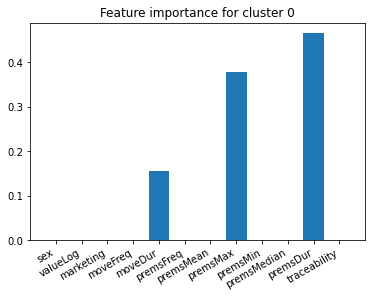

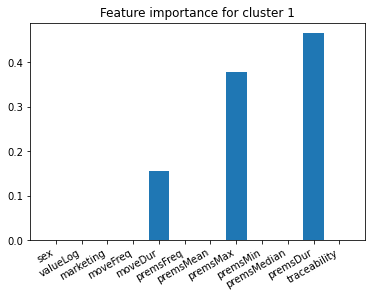

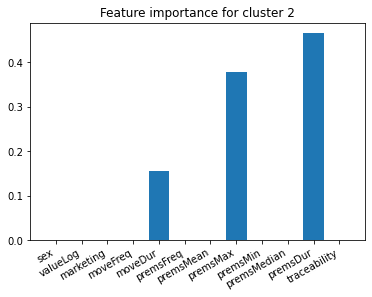

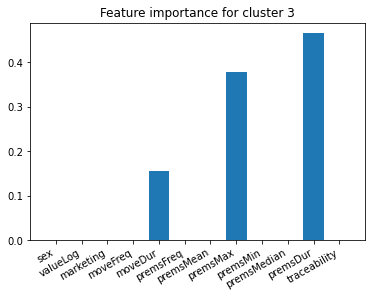

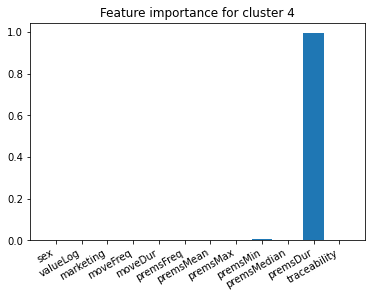

<Figure size 432x288 with 0 Axes>

In [6]:
from module.validateCluster import plotFeatureImportanceByClass
plotFeatureImportanceByClass(columnnames, featureImportance, X, labels, clas, path = './vis/', show=True)

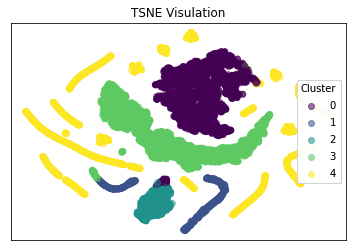

<Figure size 432x288 with 0 Axes>

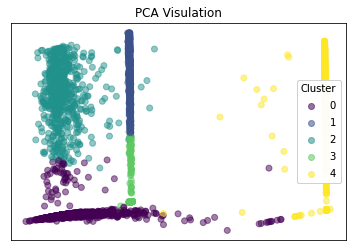

<Figure size 432x288 with 0 Axes>

In [7]:
from module.validateCluster import tsneScatter2D, pcaScatter
tsneScatter2D(X,labels, path= './vis/',show=True)
pcaScatter(X,labels, path = './vis/',show=True)